In [22]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [23]:
dataset = pd.read_csv('datasets/salary_data.csv')
#Independiente, tomara todos los valores menos la ultima
x = dataset.iloc[:, :-1].values
#Dependiente            
y = dataset.iloc[:, 1].values
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=0)

In [24]:
#models = [
#   # ('decision_tree', DecisionTreeRegressor()),
#   ('linear_regression', LinearRegression()),
#   # ('k_neighbors', KNeighborsRegressor(n_neighbors=5))
#]
### Crea un modelo de ensamble con los modelos anteriores
#model = VotingRegressor(models)
### Entrena el modelo con los datos
#model.fit(x, y)

# Train classifiers
reg1 = DecisionTreeRegressor()
reg2 = KNeighborsRegressor(n_neighbors=5)
reg3 = LinearRegression()

reg1.fit(x.reshape(-1,1), y)
reg2.fit(x.reshape(-1,1), y)
reg3.fit(x.reshape(-1,1), y)

predreg1= reg1.predict(x.reshape(-1,1)) 
predreg2= reg2.predict(x.reshape(-1,1)) 
predreg3= reg3.predict(x.reshape(-1,1)) 


ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(x.reshape(-1,1),y)
predreg4= ereg.predict(x.reshape(-1,1)) 



In [25]:
#y_pred = model.predict(x_test)
pred1 = reg1.predict(x_test)
pred2 = reg2.predict(x_test)
pred3 = reg3.predict(x_test)
pred4 = ereg.predict(x_test)


In [26]:
# The coefficients
print('m = ' + str(reg3.coef_) + ', b = ' + str(reg3.intercept_)) 
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, pred3))
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, pred3))



m = [9449.96232146], b = 25792.200198668696
Mean squared error: 19402369.95
Coefficient of determination: 0.98


Text(0, 0.5, 'y')

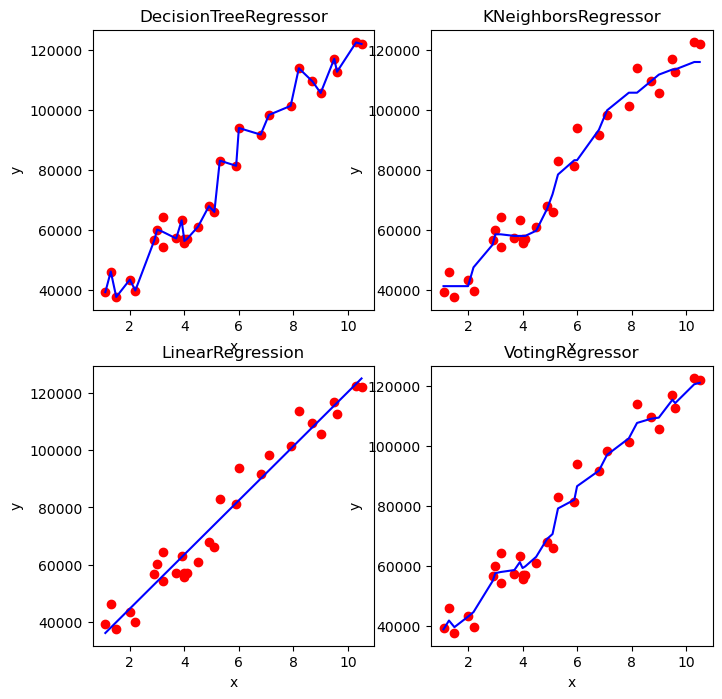

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(x, y, color="red")
plt.plot(x, predreg1, color="blue")
plt.title("DecisionTreeRegressor")
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(2,2,2)
plt.scatter(x, y, color="red")
plt.plot(x, predreg2, color="blue")
plt.title('KNeighborsRegressor')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(2,2,3)
plt.scatter(x, y, color="red")
plt.plot(x, predreg3, color="blue")
plt.title('LinearRegression')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(2,2,4)
plt.scatter(x, y, color="red")
plt.plot(x, predreg4, color="blue")
plt.title('VotingRegressor')
plt.xlabel('x')
plt.ylabel('y')

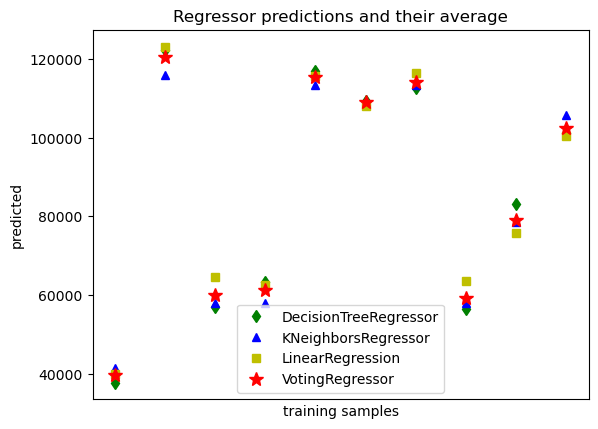

In [28]:
plt.figure()
plt.plot(pred1, "gd", label="DecisionTreeRegressor")
plt.plot(pred2, "b^", label="KNeighborsRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()